In [1]:
import itertools
import numpy as np
from numpy import pi
from qiskit import Aer, QuantumCircuit
from qiskit.compiler import transpile
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks

In [2]:
def random_quantum_state():
    z0 = np.random.randn(2) + 1j * np.random.randn(2)
    z0 = z0 / np.linalg.norm(z0)
    return z0

# Create random states
# ψ = random_quantum_state()
# ϕ = random_quantum_state()
ψ = np.array([1,0])
φ = np.array([0,1])

In [3]:
# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0],  [0]

params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))
# Initialize Discriminator
discriminator = StateDiscriminativeQuantumNeuralNetworks(ψ, ϕ)

# Calculate cost function
discriminator.cost_function(params)

0.0

In [4]:
circuit = discriminator.get_n_element_povm(2,th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2)

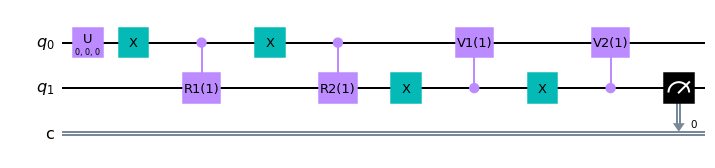

In [5]:
qc1 = QuantumCircuit(2, 1)
qc1.compose( circuit, [0,1], inplace=True )
qc1.measure(1,0)
qc1.draw(output='mpl')

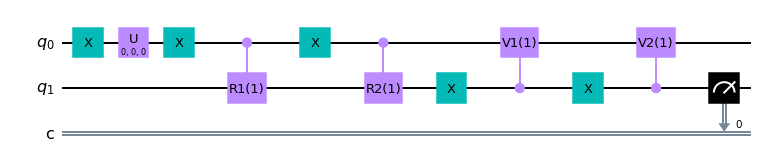

In [6]:
qc2 = QuantumCircuit(2, 1)
qc2.x(0)
qc2.compose( circuit, [0,1], inplace=True ) 
qc2.measure(1,0)
qc2.draw(output='mpl')

In [7]:
backend_sim = Aer.get_backend(discriminator._backend)

In [8]:
qcs = transpile( [qc1,qc2], backend_sim) 

In [9]:
results = backend_sim.run( qcs ).result()

In [10]:
results.get_counts(qc1)

{'0': 1024}

In [11]:
results.get_counts(qc2)

{'1': 1024}